In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 성적 데이터 생성

In [2]:
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
                   columns = ['시간','성적'])
data

,시간,성적
0,2,20
1,4,40
2,8,80
3,9,90


### 1. 수학 공식을 이용한 해석적 모델
- LinearRegression

In [3]:
# LinearRegression 모델 받아오기
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [6]:
# X(문제) -> 시간(2차원) : 행렬벡터로 이루어짐(행렬백터 자체가 2차원데이터) -> 대괄호 2개 씌어줘야 함
# y(정답) -> 성적(1차원)
linear.fit(data[['시간']], data['성적'])
# 입력특성(데이터)에 대해서 데이터들을 모두 반영한 예측함수를 만듦

LinearRegression()

In [8]:
print('가중치 : ', linear.coef_)
print('절편 : ', linear.intercept_)

가중치 :  [10.]
절편 :  7.105427357601002e-15


In [9]:
# 7시간 공부했을 때의 점수는?
# 문제이기 때문에 2차원으로
linear.predict([[7]])

array([70.])

### 2. 경사하강법
- 가중치(w)변화에 따른 비용함수(평균제곱오차 : MSE)값의 변화 그래프

### H(x)
- 예측함수
- y = wx + 0

In [11]:
def h(w, x):
    # w : 가중치
    # x : 데이터
    return w * x + 0

### 비용함수(cost function)
- 평균제곱오차(MSE)

In [13]:
def cost(data, target, weight):
    # data -> 문제
    # target -> 정답
    # weight -> 가중치
    y_pre = h(weight, data)
    # 예측함수에 가중치와 문제를 넣음 -> 예측값을 출력
    # 예측값 - 실제값 = 오차
    # y_pre - target = 오차
    # ** 2 : 제곱
    # .mean() : 평균
    return ((y_pre - target) ** 2).mean()

In [14]:
# 비용함수 -> 평균제곱오차
# 평균제곱오차값이 0에 가까울 수록 예측을 잘한 함수
cost(data['시간'], data['성적'], 10)

0.0

In [15]:
cost(data['시간'], data['성적'], 12)

165.0

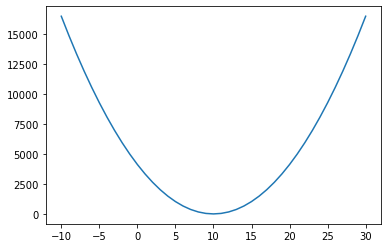

In [20]:
# 그래프 그릴 가중치 범위 (-10 ~ 30)
weight_arr = range(-10, 31)


# 비용함수(MSE)값을 담을 리스트 생성
cost_list = []
for w in weight_arr:
    c = cost(data['시간'], data['성적'], w)
    cost_list.append(c)
    
# 그래프 그리기
plt.plot(weight_arr, cost_list)
plt.show()

- SGDRegressor
- 경사하강법을 사용

In [21]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(
        max_iter = 1000, # 가중치 업데이트
        eta0 = 0.01, # 학습률
        verbose = 1 # 학습과정확인
        )

In [26]:
sgd.fit(data[['시간']], data['성적'])

-- Epoch 1
Norm: 8.17, NNZs: 1, Bias: 1.261105, T: 4, Avg. loss: 999.488998
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.37, NNZs: 1, Bias: 1.436658, T: 8, Avg. loss: 31.095164
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.67, NNZs: 1, Bias: 1.473184, T: 12, Avg. loss: 2.542369
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.76, NNZs: 1, Bias: 1.480341, T: 16, Avg. loss: 0.441904
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.79, NNZs: 1, Bias: 1.478514, T: 20, Avg. loss: 0.255354
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.80, NNZs: 1, Bias: 1.474741, T: 24, Avg. loss: 0.230906
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.81, NNZs: 1, Bias: 1.469803, T: 28, Avg. loss: 0.230174
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.81, NNZs: 1, Bias: 1.465122, T: 32, Avg. loss: 0.226308
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.81, NNZs: 1, Bias: 1.460114, T: 36, Avg. loss: 0.226601
Total training time: 0.00 seconds.
-- Epoch 

SGDRegressor(verbose=1)

In [27]:
print('가중치 : ', sgd.coef_)
print('절편 : ', sgd.intercept_)

가중치 :  [9.8343665]
절편 :  [1.22987217]
